In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("E:\movie imdb\insurance.csv")

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [6]:
x

array([[27.9 ,  0.  ],
       [33.77,  1.  ],
       [33.  ,  3.  ],
       ...,
       [36.85,  0.  ],
       [25.8 ,  0.  ],
       [29.07,  0.  ]])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=10)

The Accuracy for Test Set is 79.1044776119403


Text(0.5, -7.277777777777782, 'Predicted Values')

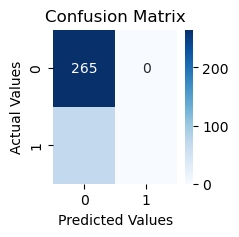

In [9]:
y_pred = classifier.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (2,2))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.79      1.00      0.88       265
         yes       0.00      0.00      0.00        70

    accuracy                           0.79       335
   macro avg       0.40      0.50      0.44       335
weighted avg       0.63      0.79      0.70       335



C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)